In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

# Problem 1

In this problem we will look at image compression using SVD, following the lines of the well-known "Eigenfaces" experiment. The basic concept is to represent an image (in grayscale) of size $m \times n$ as an $m \times n$ real matrix $M$. SVD is then applied to this matrix to obtain $U$, $S$, and $V$ such that $M = U S V^T$. Here $U$ and $V$ are the matrices whose columns are the left and right singular vectors respectively, and $S$ is a diagonal $m \times n$ matrix consisting of the singular values of $M$. The number of non-zero singular values is the rank of $M$. By using just the largest $k$ singular values (and corresponding left and right singular vectors), one obtains the best rank-$k$ approximation to $M$.

The following code returns the dataset of 40 images.

In [2]:
data = datasets.fetch_olivetti_faces()
images = data.images

(a) Given an $m \times n$ image $M$ and its rank-$k$ approximation $A$, we can measure the reconstruction error using mean $\ell_1$ error: $$ \text{error}_{\ell_1}(M, A) = \frac{1}{mn}\| M - A \|_1 = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}| M_{i,j} - A_{i,j} |. $$ For $k = 1, \dots, 30$, take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

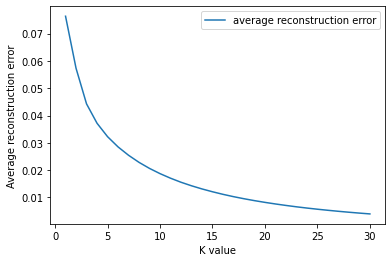

In [3]:
def calculate_error(A,M): #calculate reconstruction error of k approximated image with the original
    return np.sum(np.abs(M-A))/(images.shape[1]*images.shape[2])

def k_approximate_matrix(u,s,vh,k): #calculate the k approximate matrix for a 
    smat=np.diag(s[0:k]) #construct a kXk diagonal matrix from the singular values s
    return np.dot(np.dot(u[:,0:k],smat),vh[0:k,:])

error_matrix=[]

for i in range(images.shape[0]): #iterating through the 400 images
    error_vector=[]
    u,s,vh=svd(images[i],full_matrices=False) #find the SVD of each image in the dataset
    
    for k in range(1,31): #for each image, find the k approximations from 1-30
        A=k_approximate_matrix(u,s,vh,k)
        error_vector.append(calculate_error(A,images[i])) #error_vector contains the error at k values ranging from 1-30 w.r.t an original image 
        
    error_matrix.append(error_vector) #error_matrix contains the error_vector for all the images in the dataset 
error_matrix=np.array(error_matrix) #converting the list into numpy array


avg_errors_at_rank_k=[]

for k in range(0,30):
    avg_errors_at_rank_k.append(np.average(error_matrix[:,k]))


plt.plot(range(1,31),avg_errors_at_rank_k,label='average reconstruction error')
plt.xlabel('K value')
plt.ylabel('Average reconstruction error')
plt.legend()

(b) Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$. You will find the `imshow` method in matplotlib useful for this; pass in `cmap='gray'` to render in grayscale. Feel free to play around further.

<Figure size 432x288 with 0 Axes>

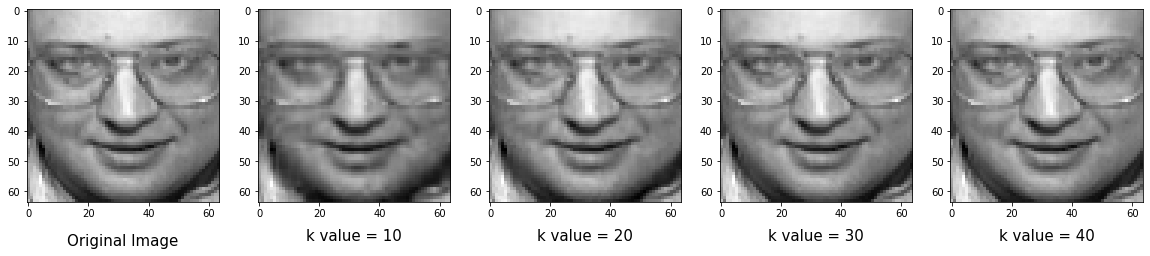

In [4]:
index=np.random.randint(0,images.shape[0]) #choose a random image from the dataset
u,s,vh=svd(images[index],full_matrices=False) #find the svd decomposition of the image


plt.figure()
f, axarr = plt.subplots(1,5, figsize=(20,20))
axarr[0].imshow(images[index],cmap='gray')
axarr[0].set_xlabel('Original Image',labelpad=15, fontsize=15)


k_vals=[10,20,30,40]

for i in range(len(k_vals)):
    A=k_approximate_matrix(u,s,vh,k_vals[i]) 
    axarr[i+1].set_xlabel('k value = %d' %(k_vals[i]),labelpad=10, fontsize=15)
    axarr[i+1].imshow(A,cmap='gray')


# Problem 2

In this problem we visualize the Wisconsin breast cancer dataset in two dimensions using PCA. First, rescale the data so that every feature has mean 0 and standard deviation 1 across the various points in the dataset. You may find `sklearn.preprocessing.StandardScaler` useful for this. Next, compute the top two principal components of the dataset using PCA, and for every data point, compute its coordinates (i.e. projections) along these two principal components. You should do this in two ways:
1. By using SVD directly. Do not use any PCA built-ins.
2. By using `sklearn.decomposition.PCA`.

The two approaches should give exactly the same result, and this also acts as a check. (But note that the signs of the singular vectors may be flipped in the two approaches since singular vectors are only determined uniquely up to sign. If this happens, flip signs to make everything identical again.)

Your final goal is to make a scatterplot of the dataset in 2 dimensions, where the x-axis is the first principal component and the y-axis is the second. Color the points by their diagnosis (malignant or benign). Do this for both approaches. Your plots should be identical. Does the data look roughly separable already in 2 dimensions?

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Verified that the top 2 principal components' projections obtained via SVD and builtin PCA are the same


<Figure size 432x288 with 0 Axes>

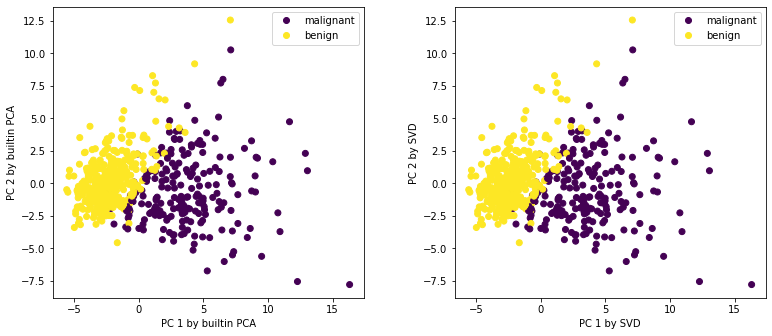

In [6]:
cancer = datasets.load_breast_cancer()

#preprocessing step to make mean=0 and variance=1
scaler = StandardScaler()
scaler.fit(cancer.data)
preprocessed_data=scaler.transform(cancer.data)

u,s,vh=svd(preprocessed_data,full_matrices=False) #svd decomposition on the preprocessed matrix
svd_obtained_pca=vh[0:2,:] #extracting the top 2 principal components

svd_dataset_projection=[]
for i in range(preprocessed_data.shape[0]):
    projection=[]
    projection.append(np.dot(preprocessed_data[i],svd_obtained_pca[0]))
    projection.append(np.dot(preprocessed_data[i],svd_obtained_pca[1]))
    
    svd_dataset_projection.append(projection)
    
svd_dataset_projection = -1*np.array(svd_dataset_projection) #sign inversion to make the 2 PCA components match

#calculating the top 2 principal components by using built in PCA method
pca = PCA(n_components=2)
pca_dataset_projection = pca.fit_transform(preprocessed_data)

result = np.allclose(pca_dataset_projection,svd_dataset_projection) #verifying that the PCA components obtained by both the methods are equal
if result == True :
    print("Verified that the top 2 principal components' projections obtained via SVD and builtin PCA are the same")
    
plt.figure()
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
f.tight_layout(pad=6.0)

l1=ax1.scatter(pca_dataset_projection[:,0],pca_dataset_projection[:,1],c=cancer.target)
ax1.set_xlabel('PC 1 by builtin PCA')
ax1.set_ylabel('PC 2 by builtin PCA')
ax1.legend(handles=l1.legend_elements()[0],labels=['malignant', 'benign'])

l2=ax2.scatter(svd_dataset_projection[:,0],svd_dataset_projection[:,1],c=cancer.target)
ax2.set_xlabel('PC 1 by SVD')
ax2.set_ylabel('PC 2 by SVD')
ax2.legend(handles=l2.legend_elements()[0],labels=['malignant', 'benign'])

#f.legend([l1,l2],labels=['malignant', 'benign'])

#### The data looks almost linearly separable with just the top 2 components
#### The plots are identical in both the cases